In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬版資料作SVM

In [2]:
x = np.array([[6,6],[10,8],[3,7],[8,7]])

In [3]:
x[:,0]

array([ 6, 10,  3,  8])

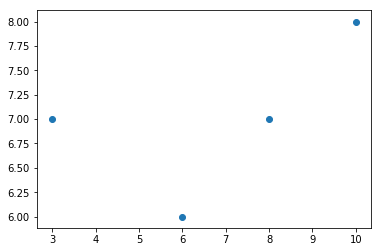

In [4]:
plt.scatter(x[:,0],x[:,1]);

In [5]:
y = np.array([1,2,1,2])

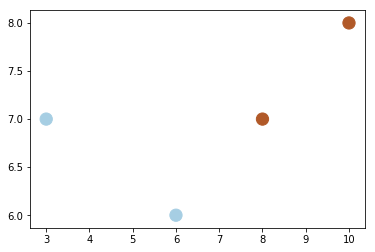

In [9]:
plt.scatter(x[:,0],x[:,1],c = y, cmap='Paired',s =150);

### step 1. 打開函數學習

In [10]:
from sklearn.svm import SVC

In [13]:
clf = SVC(gamma='auto')

### step 2. 學習

In [14]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### step 3. 預測

In [16]:
y_predic = clf.predict(x)

In [17]:
y_predic

array([1, 2, 1, 2])

In [18]:
y 

array([1, 2, 1, 2])

In [19]:
xr = np.random.rand(100)*7 + 3
yr = np.random.rand(100)*6 + 4

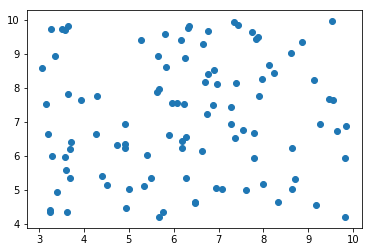

In [20]:
plt.scatter(xr,yr)

In [22]:
X = np.c_[xr,yr]

In [23]:
Y = clf.predict(X)

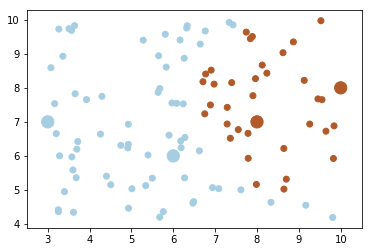

In [25]:
plt.scatter(X[:,0],X[:,1],c = Y, cmap = 'Paired')
plt.scatter(x[:,0],x[:,1],c = y, cmap = 'Paired', s = 150 );

### 結果呈現

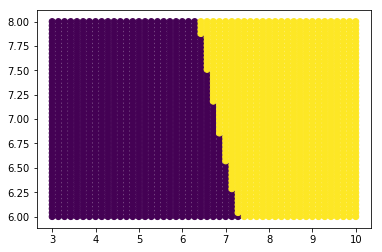

In [27]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)
X, Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(),Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0], P[:,1], c=C)

### countour 用法

In [29]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y = np.meshgrid(xL, yL)

In [30]:
Z = np.random.randint(1, 3,(4,4))

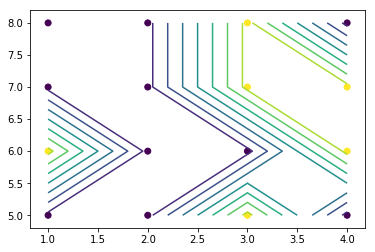

In [34]:
plt.contour(X,Y,Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

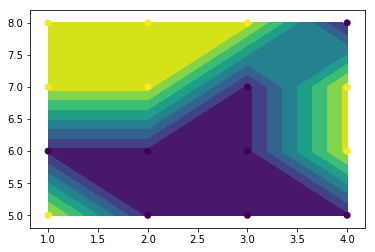

In [36]:
Z = np.random.randint(1, 3,(4,4))
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

### 視覺化

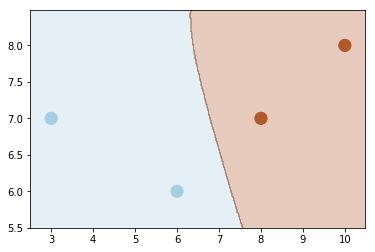

In [39]:
x_arr = np.arange(2.5, 10.5, 0.02)
y_arr = np.arange(5.5, 8.5, 0.02)
X, Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(),Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)

plt.contourf(X, Y, Z, cmap = 'Paired', alpha=0.3)
plt.scatter(x[:,0],x[:,1],c = y, cmap = 'Paired', s = 150 );

### Iris data example

In [40]:
from sklearn.datasets import load_iris

In [41]:
iris = load_iris()

In [42]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [43]:
x  = iris.data
y = iris.target

In [45]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [47]:
y[:5]

array([0, 0, 0, 0, 0])

In [50]:
X = x[:, :2]
Y = y

### 區分訓練資料、測試資料

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

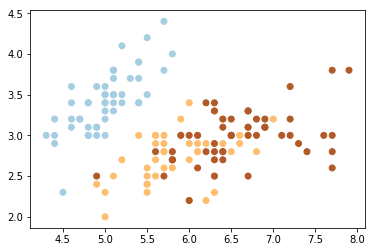

In [53]:
plt.scatter(X[:,0], X[:,1], c = Y, cmap = 'Paired')

In [54]:
clf  = SVC(gamma='auto')

In [55]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
y_predict = clf.predict(x_test)

In [58]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [59]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [60]:
y_predic - y_test

ValueError: operands could not be broadcast together with shapes (4,) (30,) 